<a href="https://colab.research.google.com/github/pablex72/vi-phenology-analysis-/blob/main/FIXED_Reproductivity_LSTM_FINAL_LSTM_GRU_XGBoost_Random_Forest_SVM_mm11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LSTM

**Importing Libraries**

FIXINIG ?

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_81 (LSTM)              (None, 1, 32)             4352      
                                                                 
 dropout_54 (Dropout)        (None, 1, 32)             0         
                                                                 
 lstm_82 (LSTM)              (None, 1, 16)             3136      
                                                                 
 dropout_55 (Dropout)        (None, 1, 16)             0         
                                                                 
 lstm_83 (LSTM)              (None, 32)                6272      
                                                                 
 dense_27 (Dense)            (None, 1)                 33        
                                                                 
Total params: 13793 (53.88 KB)
Trainable params: 1379

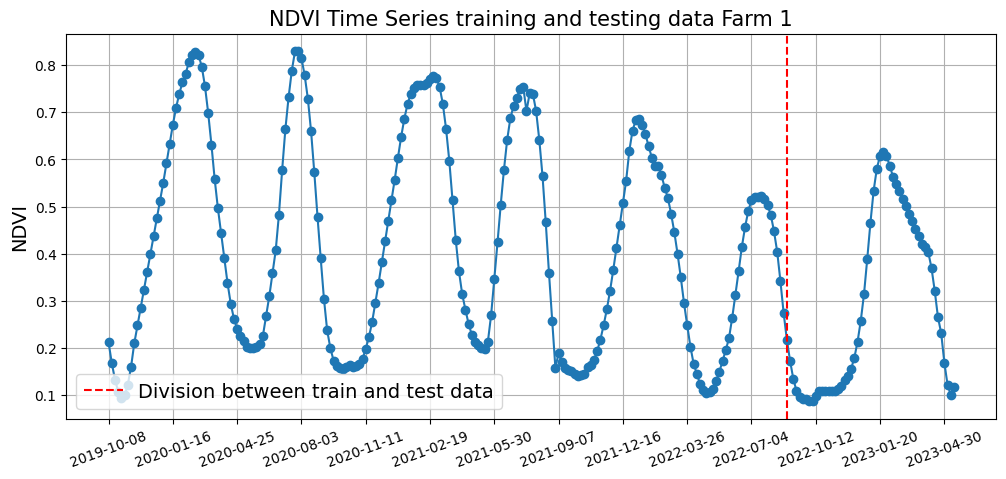

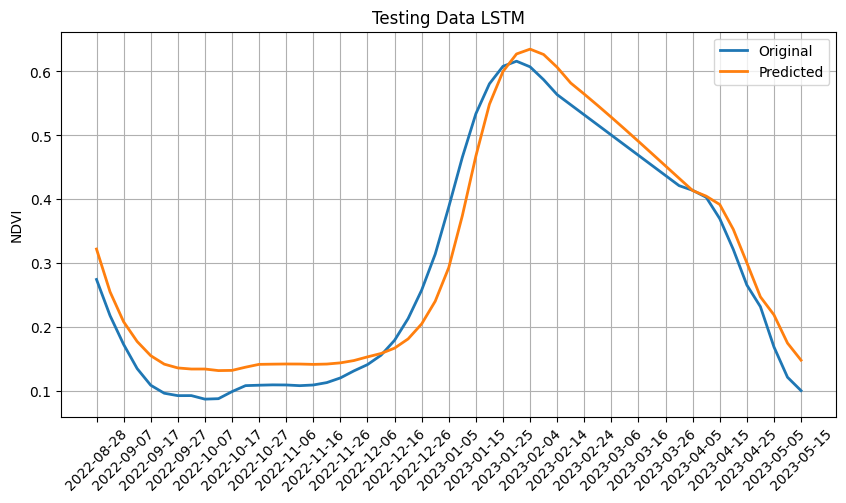

In [33]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


###################


df = pd.read_csv('/content/sg_smoothed_ndvi_farm1.csv')

#Plotting the Full Dataset
fig, ax = plt.subplots(figsize=(12, 5))
index_80_percent = int(len(df) * 0.8)

ax.plot(df['NDVI'], "o-")
ax.set_xticks(range(0, len(df['Date'].values), 20))
ax.set_xticklabels(df['Date'].values[::20], rotation=20,fontsize = 10)
ax.set_ylabel('NDVI',fontsize = 14) # set the label for the y-axis
ax.set_title('NDVI Time Series training and testing data Farm 1',fontsize = 15)
ax.axvline(df.index[index_80_percent], 0, 1, label='Division between train and test data', c='r', linestyle='--')
ax.legend(prop={"size": 14},loc="lower left")
ax.grid(True)

dfDate = df[['Date']]  #index, date (dataframe)

#making date column into index column
df.index = df.pop('Date') #date, ndvi (no index) (dataframe)

testDf = df
df = df.values # ndvi (array)

dfDate=dfDate.values
#dfDate = np.array(dfDate)
dfDate = dfDate.flatten() # date ()
#############################################################################33    FEATURE LENGTH
feature_length = 1
#Splitting
def Create_Features_and_Targets(data, dates, feature_length):
  X = list()
  Y = list()
  datesF = list()
  for i in range(len(data) - feature_length - 1):
    X.append(data[i:(i + feature_length), :])
    Y.append(data[i + feature_length, -1])
  X = np.array(X)
  Y = np.array(Y)
  datesF = np.array(dates[feature_length+1:])
  return datesF, X, Y

dates, X, y = Create_Features_and_Targets(df,dfDate, feature_length)

q_80 = int(len(dates) * .8)
dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_test, X_test, y_test = dates[q_80:], X[q_80:], y[q_80:]

#LSTM MODEL


###############################
# Create the model by importing the required libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

from tensorflow.keras.optimizers import Adam
import numpy as np
import tensorflow as tf
import random as rn

  # np.random.seed(42)
  # tf.random.set_seed(42)
##################################33
# Setting the seed for numpy-generated random numbers
np.random.seed(37)

# Setting the seed for python random numbers
rn.seed(1254)

# Setting the graph-level random seed.
tf.random.set_seed(42)
#########################################3
# from numpy.random import seed
# seed(1)
# from tensorflow import set_random_seed
# set_random_seed(2)
#########################################
# Define the optimizer with a lower learning rate
adam = Adam(lr=0.001)
# LSTMs are recurrent neural networks (RNNs). In simple terms, LSTMs work by allowing the network to remember
# the context of the model while forgetting the irrelevant information.
model = Sequential([
    LSTM(32, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.3),
    LSTM(16, return_sequences=True),
    Dropout(0.3),
    LSTM(32),
    Dense(1, activation='sigmoid'),
])
model.compile(optimizer=adam, loss="mean_squared_error")
model.summary()

history = model.fit(
    X_train,
    y_train,
    epochs = 100,
    batch_size = 12,
    verbose = 0,
)

y_pred = model.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Calculate predicted values
y_pred_lstm = model.predict(X_test)

# Calculate evaluation metrics
r2_lstm = r2_score(y_test, y_pred_lstm)
rmse = mean_squared_error(y_test, y_pred_lstm, squared=False)
mse = mean_squared_error(y_test, y_pred_lstm, squared=True)
mae = mean_absolute_error(y_test, y_pred_lstm)

# Print the evaluation metrics
print("Fixed LSTM R^2 score: ", r2_lstm)
print("LSTM Root Mean Squared Error (RMSE): ", rmse)
print("LSTM Mean Squared Error (MSE): ", mse)
print("LSTM Mean Absolute Error (MAE): ", mae)

#Plot Testing Data
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(y_test, linewidth=2, label = 'Original')
ax.plot(y_pred_lstm, linewidth=2, label = 'Predicted')
ax.set_xticks(range(0, len(dates_test), 2))
ax.set_xticklabels(dates_test[::2], rotation=45)

ax.set_title('Testing Data LSTM')
ax.set_ylabel('NDVI')
ax.legend()#
ax.grid(True)
plt.show()